In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
from pandas import Series
from numpy import log

In [2]:
dataset = pd.read_csv("airline_passengers.csv")
dataset.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
dataset.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
dataset['Month'] = pd.to_datetime(dataset['Month'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [7]:
dataset.set_index('Month', inplace=True)

In [10]:
dataset.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

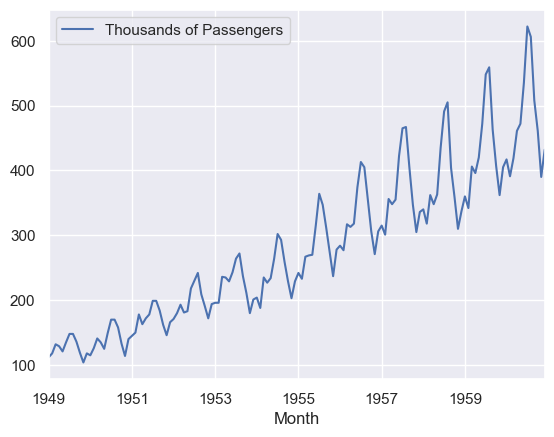

In [8]:
dataset.plot()

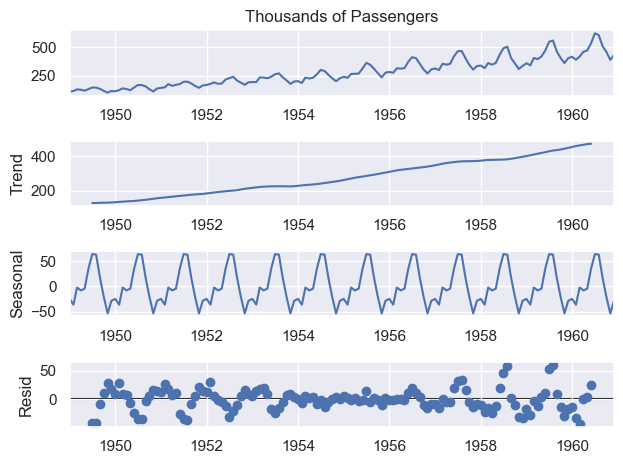

In [12]:
# Decomposition to check dataset component 
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(dataset['Thousands of Passengers'], model='additive',period=12)
decompose.plot()
plt.show()

# Check autocorrelation part - Durbin Watson Test

In [14]:
import statsmodels.api as sm

In [15]:
sm.stats.durbin_watson(dataset['Thousands of Passengers'])

0.0121527966037621

# Check Data is Stationary or Non-Stationary

In [16]:
# Augmented Dickey Fuller Test - check data stationiarity 
from statsmodels.tsa.stattools import adfuller

In [17]:
adfuller(dataset['Thousands of Passengers'])

(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [18]:
def stationarity(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey Fuller Test - To check data is Stationary or Not")
    labels = ['ADF Test stats', 'P-Value','#Lags', 'No. of Observation']
    
    for i, j in zip(result, labels):
        print(j + " :-->" + str(i) )
        
    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my time series is Stationary")
    else:
        print("Weak Evidence against null hypothesis and my times series is non-stationary")

In [19]:
stationarity(dataset['Thousands of Passengers'])

Augmented Dickey Fuller Test - To check data is Stationary or Not
ADF Test stats :-->0.8153688792060482
P-Value :-->0.991880243437641
#Lags :-->13
No. of Observation :-->130
Weak Evidence against null hypothesis and my times series is non-stationary


In [20]:
dataset['1st Diff'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(1)

In [21]:
dataset.head(10)

,Thousands of Passengers,1st Diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
1949-06-01,135,14.0
1949-07-01,148,13.0
1949-08-01,148,0.0
1949-09-01,136,-12.0


In [24]:
stationarity(dataset['1st Diff'].dropna())

Augmented Dickey Fuller Test - To check data is Stationary or Not
ADF Test stats :-->-2.8292668241699994
P-Value :-->0.0542132902838255
#Lags :-->12
No. of Observation :-->130
Weak Evidence against null hypothesis and my times series is non-stationary


In [25]:
dataset['2nd Diff'] = dataset['1st Diff'] - dataset['1st Diff'].shift(1)

In [26]:
dataset.head(10)

,Thousands of Passengers,1st Diff,2nd Diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
1949-06-01,135,14.0,22.0
1949-07-01,148,13.0,-1.0
1949-08-01,148,0.0,-13.0
1949-09-01,136,-12.0,-12.0


In [27]:
stationarity(dataset['2nd Diff'].dropna())

Augmented Dickey Fuller Test - To check data is Stationary or Not
ADF Test stats :-->-16.384231542468505
P-Value :-->2.7328918500142407e-29
#Lags :-->11
No. of Observation :-->130
Strong evidence against null hypothesis and my time series is Stationary


In [ ]:
# parameter - p d q (Trend)
# d = 2